This is a tutorial for using [ODT Flow Explorer](http://gis.cas.sc.edu/GeoAnalytics/od.html). The API reference is in [here](https://github.com/GIBDUSC/ODT_Flows/wiki/ODT-Flow-REST-APIs). Each API performs a specific task such as aggregate the flows for a selected place and download flow data for an interested geographic area. All APIs return data in CSV (comma-separated values) format. The API is specified in the **operation** parameter in the API query(see examples below).

# Import packages

Please install packages before importing. This toturial is tested in Windows 10 and Ubuntu 18.04 using Chrome browser.

In [204]:
import os
import pandas as pd
import numpy as np
import requests
from io import StringIO
# import gdal
import keplergl
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Query Examples

These examples show how to use API to obtain data in Jupyternotebook.

## od_by_place

Return the aggregated movement between the selected place and other places. (Corresponding to the Choropleth Map function in the Explorer).

In [43]:
target_FIPS = 32003   # Clark County, NV, Las Vegas city

params = {"operation": "od_by_place",
       "odt_cube": "sg_od_2020_county",
        "place": str(target_FIPS),
       "begin": "01/01/2020",
       "end": "12/31/2020",
       "direction": "both"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

In [44]:
df = pd.read_csv(StringIO(r.text), header=None, names=["place", "count"])
df

,place,count
0,8089,492
1,20197,321
2,24043,1787
3,5041,120
4,20063,226
...,...,...
3175,36031,248
3176,4021,50482
3177,48027,13562
3178,20123,104


## od_daily_movement_by_place

Return the daily inter-unit movements between the selected place and other places or the selected place's daily intra-unit movements. (Corresponding to the Daily Movements function in the Explorer).

In [5]:
target_FIPS = 32003   # Clark County, NV, Las Vegas city

params = {"operation": "od_daily_movement_by_place",
       "odt_cube": "sg_od_2020_county",
        "place": str(target_FIPS),
       "direction": "both"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

In [444]:
df = pd.read_csv(StringIO(r.text), header=None, names=["date", "count"])
df

,date,count
0,2020-01-01,90072
1,2020-01-02,85405
2,2020-01-03,84444
3,2020-01-04,81675
4,2020-01-05,67064
...,...,...
361,2020-12-27,54506
362,2020-12-28,50006
363,2020-12-29,48610
364,2020-12-30,50815


## od_daily_movement

Return the daily movements for all places of a specific geographic level (currently return intra movement). Supported geographic levels (odt_cube) and time periods for this API include:

- sg_us_state


- sg_us_county


- twitter_us_state


- twitter_world_country


- twitter_world_first_admin


- SafeGraph data from 01/01/2019 to 02/24/2021


- Twitter data from 01/01/2019 to 12/31/2020

In [104]:
params = {"operation": "od_daily_movement",
       "odt_cube": "twitter_world_first_admin",
       "begin": "01/01/2020",
       "end": "01/31/2020"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

In [105]:
df = pd.read_csv(StringIO(r.text))
df

,place,date,intra_movement
0,AFG.11_1,2020-01-04,1
1,AFG.11_1,2020-01-06,1
2,AFG.12_1,2020-01-02,1
3,AFG.12_1,2020-01-03,1
4,AFG.12_1,2020-01-06,1
...,...,...,...
61489,ZWE.9_1,2020-01-17,1
61490,ZWE.9_1,2020-01-21,1
61491,ZWE.9_1,2020-01-28,1
61492,ZWE.9_1,2020-01-30,2


## od_extract_data

Return the selected OD flows in either temporally aggregated format or daily format.

In [462]:
params = {"operation": "od_extract_data",
       "odt_cube": "twitter_od_2019_county",
       "begin": "04/01/2019" ,
       "end": "04/02/2019",
       "bbox": "-90,90,-180,180",
       "type": "aggregated"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

In [463]:
df = pd.read_csv(StringIO(r.text))
df

,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
0,48477,48473,1,30.160,-96.398,30.083,-95.990
1,20079,20173,1,38.141,-97.431,37.684,-97.344
2,40051,40109,1,35.024,-97.930,35.468,-97.516
3,28043,28081,1,33.766,-89.808,34.264,-88.728
4,12095,12115,4,28.501,-81.322,27.325,-82.518
...,...,...,...,...,...,...,...
23995,36119,36087,7,41.155,-73.857,41.156,-73.976
23996,37143,37143,1,36.187,-76.469,36.187,-76.469
23997,20091,29021,1,38.954,-94.734,39.767,-94.847
23998,22087,13319,1,29.983,-90.011,32.678,-83.174


## od_download_url

Same as od_extract_data, but returns a download URL and number of records instead of directly returning the csv data.

In [465]:
params = {"operation": "od_download_url",
       "odt_cube": "twitter_od_2020_county",
       "begin": "01/01/2020" ,
       "end": "01/10/2020",
       "bbox": "20.19346,49.33148,-125.19531,-64.10156",
       "type": "daily"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

In [473]:
download_url, count = r.text.split(",")
print("download_url:", download_url)
print("count:", count)

# download the response
file_name = download_url.split('/')[-1]
print("Downloading data...")
download_resp = requests.get(download_url, allow_redirects=True)
f = open(file_name, 'w')
f.write(download_resp.text)
print("Saved data in:", os.path.join(os.getcwd(), file_name))
df = pd.read_csv(StringIO(download_resp.text))
df

download_url: http://gis.cas.sc.edu/GeoAnalytics/download/daily_twitter_od_2020_county_01012020_01102020_1615660710959.csv
count: 154282
Saved data in: D:\Code\Jupyter\daily_twitter_od_2020_county_01012020_01102020_1615660710959.csv


,o_place,d_place,year,month,day,cnt,o_lat,o_lon,d_lat,d_lon
0,4023,4023,2020,1,2,7,31.423,-110.956,31.423,-110.956
1,48227,48095,2020,1,9,6,32.245,-101.442,31.169,-100.077
2,48005,48347,2020,1,8,3,31.372,-94.721,31.580,-94.659
3,28003,28089,2020,1,5,1,34.933,-88.523,32.571,-89.876
4,27115,27115,2020,1,9,1,45.830,-92.964,45.830,-92.964
...,...,...,...,...,...,...,...,...,...,...
154277,39025,39027,2020,1,9,1,38.962,-84.064,39.299,-83.969
154278,26045,26045,2020,1,1,25,42.685,-84.724,42.688,-84.711
154279,54011,54019,2020,1,1,1,38.408,-82.440,37.986,-81.153
154280,42019,42003,2020,1,4,9,40.724,-80.036,40.503,-80.039


# Case study No.0:

## extract data, may take 30 seconds.

In [205]:
def get_Subdivition_flows_by_country(country_code, params):
    country_code = str(country_code)
    max_subs = 85
    subs = [f"{country_code}.{i + 1}_1" for i in range(max_subs)]
    dfs = []
    attemp_max = 3
    attemp_cnt = 0

    for sub in subs:
        params['place'] = sub
        
        df = request_flows(params)
#         print(df)

        print(f"obtaining {len(df)} record from {sub}.")
        dfs.append(df)
        if len(df) < 1:
            attemp_cnt += 1
        if attemp_cnt > attemp_max:
            break
        
        
    df = pd.concat(dfs, axis = 0)
    return df


def request_flows(params):

#     print(r.text)
    return df

target_place = r'ITA'   # Clark County, NV, Las Vegas city


params = {"operation": "od_daily_movement",
       "odt_cube": "twitter_world_first_admin",
       "begin": "01/01/2020",
       "end": "12/31/2020"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)
df = pd.read_csv(StringIO(r.text))
df = df[df['place'].str[:3] == target_place]
df

,place,date,intra_movement
259513,ITA.10_1,2020-01-01,1223
259514,ITA.10_1,2020-01-02,1270
259515,ITA.10_1,2020-01-03,1235
259516,ITA.10_1,2020-01-04,1272
259517,ITA.10_1,2020-01-05,1349
...,...,...,...
266728,ITA.9_1,2020-12-26,206
266729,ITA.9_1,2020-12-27,218
266730,ITA.9_1,2020-12-28,235
266731,ITA.9_1,2020-12-29,211


In [206]:
df['date'] = pd.to_datetime(df['date'])

In [207]:
df = df.set_index('date')
df

,place,intra_movement
date,,
2020-01-01,ITA.10_1,1223
2020-01-02,ITA.10_1,1270
2020-01-03,ITA.10_1,1235
2020-01-04,ITA.10_1,1272
2020-01-05,ITA.10_1,1349
...,...,...
2020-12-26,ITA.9_1,206
2020-12-27,ITA.9_1,218
2020-12-28,ITA.9_1,235


In [208]:
groupped = df.groupby([pd.Grouper(freq='M'), 'place'])['intra_movement'].sum()
groupped

date        place   
2020-01-31  ITA.10_1    44896
            ITA.11_1     4084
            ITA.12_1      269
            ITA.13_1    14733
            ITA.14_1     4313
                        ...  
2020-12-31  ITA.5_1     12841
            ITA.6_1     16253
            ITA.7_1      4193
            ITA.8_1     31665
            ITA.9_1      6834
Name: intra_movement, Length: 240, dtype: int64

<AxesSubplot:xlabel='date,place'>

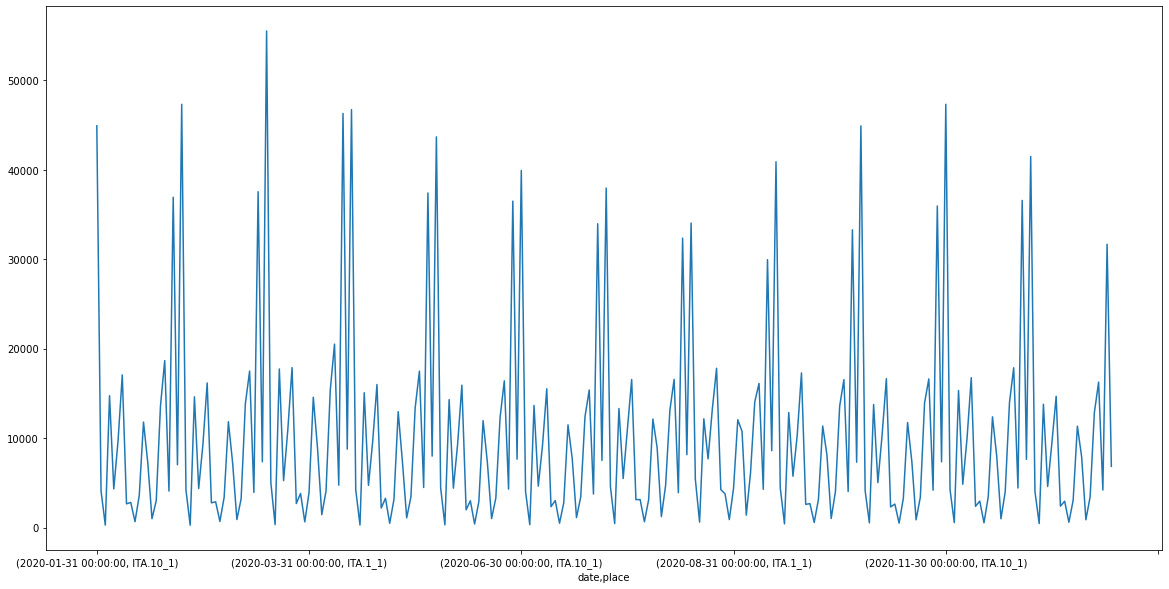

In [209]:
groupped.plot(figsize=(20, 10))

In [235]:
dates = groupped.index.get_level_values('date').unique()
len(dates)

12

In [236]:
dates

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', freq=None)

2020-01-31 00:00:00
2020-02-29 00:00:00
2020-03-31 00:00:00
2020-04-30 00:00:00
2020-05-31 00:00:00
2020-06-30 00:00:00
2020-07-31 00:00:00
2020-08-31 00:00:00
2020-09-30 00:00:00
2020-10-31 00:00:00
2020-11-30 00:00:00
2020-12-31 00:00:00


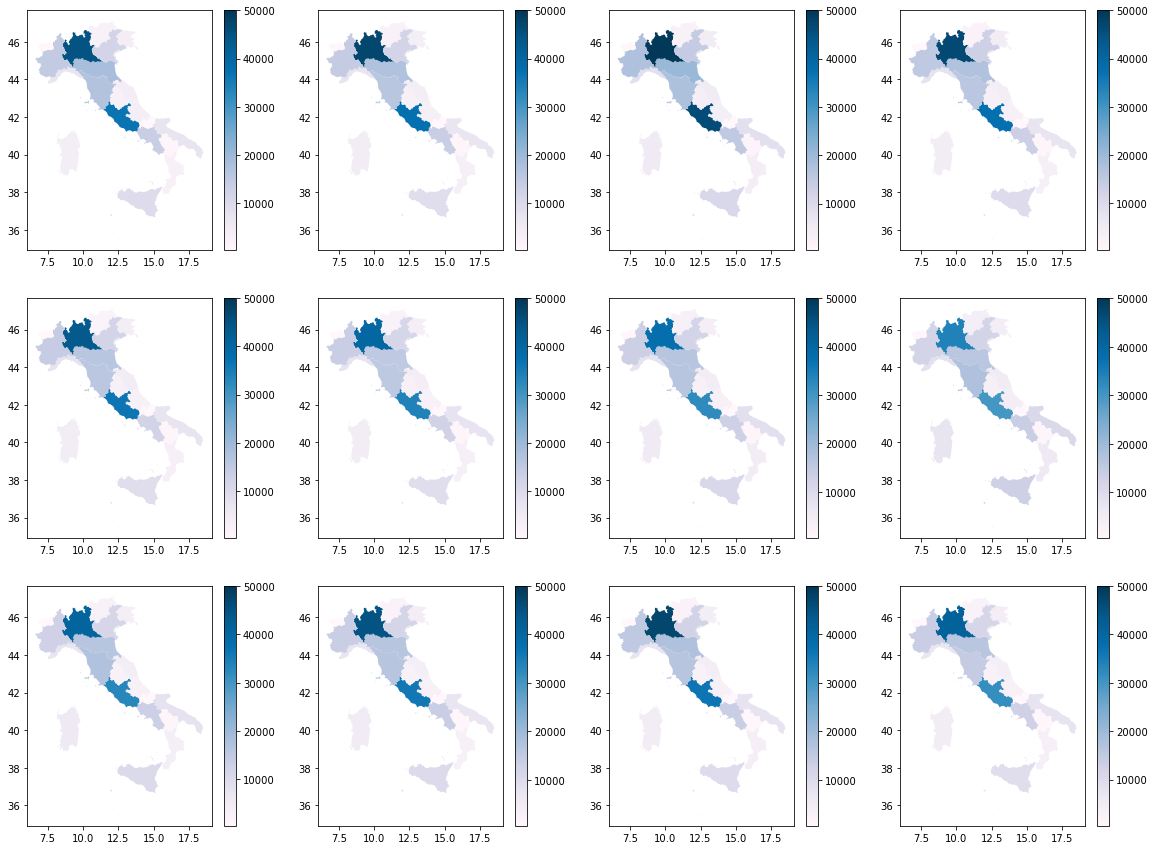

In [242]:
row_cnt = 3
col_cnt = 4
fig, axes = plt.subplots(3, 4, figsize=(20,15) )

for idx, date in enumerate(dates):
    day_df = groupped.loc[date]
    re = gdf_county.set_index('GID_1').join(day_df, how='left')
    print(date)
    re.plot(column=re['intra_movement'], cmap='PuBu',  ax=axes[divmod(idx, col_cnt)], legend=True, vmax=50000)
    
# fig.colorbar(re['intra_movement'], ax=axes.ravel().tolist())
plt.show()

In [213]:
axes[(2, 3)]

<AxesSubplot:>

In [226]:
re

,GID_0,NAME_0,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,intra_movement
GID_1,,,,,,,,,,,
ITA.1_1,ITA,Italy,Abruzzo,Abruzos|Abruzzen|Abruzzes|Abruzzi,None,Regione,Region,13,None,"POLYGON ((14.53183 41.80166, 14.49043 41.76194...",3039
ITA.2_1,ITA,Italy,Apulia,Apulien|Pouilles|Pouille|Puglia|Puglie,None,Regione,Region,16,None,"MULTIPOLYGON (((17.94931 40.05375, 17.95597 40...",7911
ITA.3_1,ITA,Italy,Basilicata,Basilicate|Lucania,None,Regione,Region,17,None,"MULTIPOLYGON (((15.71736 39.96792, 15.71458 39...",863
ITA.4_1,ITA,Italy,Calabria,Calabre|Calabrie|Kalabrien,None,Regione,Region,18,None,"MULTIPOLYGON (((15.80208 39.70014, 15.80347 39...",3431
ITA.5_1,ITA,Italy,Campania,Campanha|Campanie|Kampanien,None,Regione,Region,15,None,"MULTIPOLYGON (((13.93197 40.74681, 13.96097 40...",12841
ITA.6_1,ITA,Italy,Emilia-Romagna,Emilia Romagna|Emilia|Emilia-Romaña|Émilie-Rom...,None,Regione,Region,8,None,"MULTIPOLYGON (((12.41045 43.89840, 12.38982 43...",16253
ITA.7_1,ITA,Italy,Friuli-Venezia Giulia,Friuli Venezia Giulia|Friuli-Venecia Julia,None,Regione,Autonomous Region,6,None,"MULTIPOLYGON (((13.31625 45.69347, 13.35986 45...",4193
ITA.8_1,ITA,Italy,Lazio,Lacio|Latium,None,Regione,Region,12,None,"MULTIPOLYGON (((13.45514 40.79264, 13.45875 40...",31665
ITA.9_1,ITA,Italy,Liguria,Ligurie|Ligurien,None,Regione,Region,7,None,"MULTIPOLYGON (((9.84792 44.02930, 9.85431 44.0...",6834


In [130]:
gdf_county.set_index('GID_1')

,GID_0,NAME_0,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
GID_1,,,,,,,,,,
FRA.1_1,FRA,France,Auvergne-Rhône-Alpes,None,None,Région,Region,None,FR.AR,"POLYGON ((2.22057 44.62204, 2.20748 44.61553, ..."
FRA.2_1,FRA,France,Bourgogne-Franche-Comté,None,None,Région,Region,None,FR.BF,"POLYGON ((5.89463 46.28661, 5.85066 46.26170, ..."
FRA.3_1,FRA,France,Bretagne,None,None,Région,Region,None,FR.BT,"MULTIPOLYGON (((-2.83514 47.32681, -2.83486 47..."
FRA.4_1,FRA,France,Centre-Val de Loire,None,None,Région,Region,None,FR.CN,"POLYGON ((1.12372 46.52232, 1.09009 46.53758, ..."
FRA.5_1,FRA,France,Corse,Corsica,None,Région,Region,None,FR.CE,"MULTIPOLYGON (((9.25764 41.34903, 9.26014 41.3..."
FRA.6_1,FRA,France,Grand Est,None,None,Région,Region,None,FR.AO,"POLYGON ((4.29929 47.94861, 4.29342 47.92567, ..."
FRA.7_1,FRA,France,Hauts-de-France,None,None,Région,Region,None,FR.NC,"MULTIPOLYGON (((2.34305 51.05625, 2.34472 51.0..."
FRA.8_1,FRA,France,Île-de-France,None,None,Région,Region,None,FR.IF,"POLYGON ((3.35656 48.37845, 3.28317 48.38139, ..."
FRA.9_1,FRA,France,Normandie,None,None,Région,Region,None,FR.ND,"MULTIPOLYGON (((-1.51431 48.66097, -1.51069 48..."


In [119]:
county_file = r'gz_2010_us_050_00_20m.json'
state_file = r'gz_2010_us_040_00_20m.json'
subdivision_file = r'gadm01_simplified/gadm36_1.shp'

In [194]:
country_code = r'ITA'
gdf = gpd.read_file(subdivision_file)
gdf

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,AFG,Afghanistan,AFG.1_1,Badakhshan,Badahšan,None,Velayat,Province,None,AF.BD,"POLYGON ((71.14804 36.00124, 71.10155 35.95555..."
1,AFG,Afghanistan,AFG.2_1,Badghis,Badghes|Badghisat|Badgis,None,Velayat,Province,None,AF.BG,"POLYGON ((63.09734 34.64551, 63.06237 34.69018..."
2,AFG,Afghanistan,AFG.3_1,Baghlan,Baglan|Bughlan,None,Velayat,Province,None,AF.BL,"POLYGON ((67.35538 34.88549, 67.28322 35.07100..."
3,AFG,Afghanistan,AFG.4_1,Balkh,Balh|Mazar-i-Sharif|Mazar,None,Velayat,Province,None,AF.BK,"POLYGON ((66.42347 35.64057, 66.51625 35.67334..."
4,AFG,Afghanistan,AFG.5_1,Bamyan,None,None,Velayat,Province,None,AF.BM,"POLYGON ((66.65279 34.00322, 66.67029 34.06174..."
...,...,...,...,...,...,...,...,...,...,...,...
3605,ZWE,Zimbabwe,ZWE.6_1,Mashonaland West,None,None,Province,Province,None,ZW.MW,"POLYGON ((30.37916 -18.83976, 30.31439 -18.791..."
3606,ZWE,Zimbabwe,ZWE.7_1,Masvingo,None,None,Province,Province,None,ZW.MV,"POLYGON ((31.06733 -22.34189, 31.11290 -22.336..."
3607,ZWE,Zimbabwe,ZWE.8_1,Matabeleland North,None,None,Province,Province,None,ZW.MN,"POLYGON ((28.66857 -20.30021, 28.61305 -20.235..."
3608,ZWE,Zimbabwe,ZWE.9_1,Matabeleland South,None,None,Province,Province,None,ZW.MS,"POLYGON ((31.05947 -22.33982, 30.99968 -22.316..."


<AxesSubplot:>

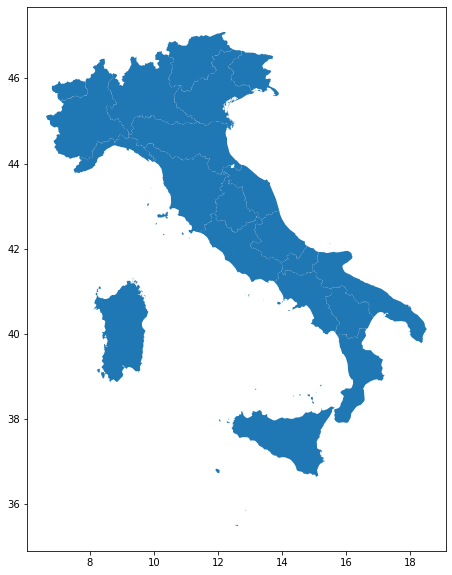

In [195]:
gdf_county = gdf[gdf['GID_1'].str[:3] == country_code]
gdf_county.plot(figsize=(20, 10))

In [198]:
len(gdf_county)

20

# Case study No.1: Impact of Covid-19 on international travels to the Great Britain  in 2020

In this case, we are going to show the impact of Covid-19 on international travels to the Great Britain (GBR) in 2020. 

First, international flows involving GBR are extracted from ODT `twitter_od_2019_country` and ODT `twitter_od_2020_country`. Both `inflow` and `outflow` are extracted. These flows are aggregated into daily summations about 700 days. The results are smoothed using a 7-day period so the fluctuation between weekends and weekdays will be removed.

Second, we plot the daily flow numbers into two annual lines. Thus the trends of two years can be easily compared. 

## extract data

In [6]:
query_place = "GBR"  # Great Britain
rolling_width = 7  # width of smoothing window
years = [2019, 2020]
years = [str(y) for y in years]
dfs = [] # store the results into a list

for year in years:
    odt_cube = f'twitter_od_{year}_country'
    params = {"operation": "od_daily_movement_by_place",
           "odt_cube": odt_cube,
            "place": query_place,
           "direction": "both"}
    q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
    r = requests.get(q, params=params)
    df = pd.read_csv(StringIO(r.text), header=None, names=["date", "count"])
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')  
    df['month_day'] = df.index.strftime("%m-%d")    
    df['date'] = df.index
    df['year'] = df.index.year    
    dfs.append(df)
    
df = pd.concat(dfs, axis=0)
df['count'] = df['count'].rolling(rolling_width, min_periods=1).mean().astype(int) # smoothing
df

,count,month_day,date,year
date,,,,
2019-01-01,1256,01-01,2019-01-01,2019
2019-01-02,1166,01-02,2019-01-02,2019
2019-01-03,1160,01-03,2019-01-03,2019
2019-01-04,1129,01-04,2019-01-04,2019
2019-01-05,1113,01-05,2019-01-05,2019
...,...,...,...,...
2020-12-26,286,12-26,2020-12-26,2020
2020-12-27,270,12-27,2020-12-27,2020
2020-12-28,263,12-28,2020-12-28,2020


## plot data

Prepare data.

In [8]:
df_plot = []
for year in years:
    d = df.loc[str(year)].set_index("month_day")
    d[year] = d['count']
    d = d.drop(['count', "date", 'year'], axis=1)
    df_plot.append(d)
    
df_plot2 = pd.concat(df_plot, axis = 1)
df_plot2 = df_plot2.sort_index()
df_plot2

,2019,2020
month_day,,
01-01,1256.0,835.0
01-02,1166.0,886.0
01-03,1160.0,909.0
01-04,1129.0,921.0
01-05,1113.0,933.0
...,...,...
12-26,815.0,286.0
12-27,802.0,270.0
12-28,791.0,263.0


Plot data. We can see a dramtical drop of international travel since the beginning of March in 2020. There are some gaps due to the lack of data.

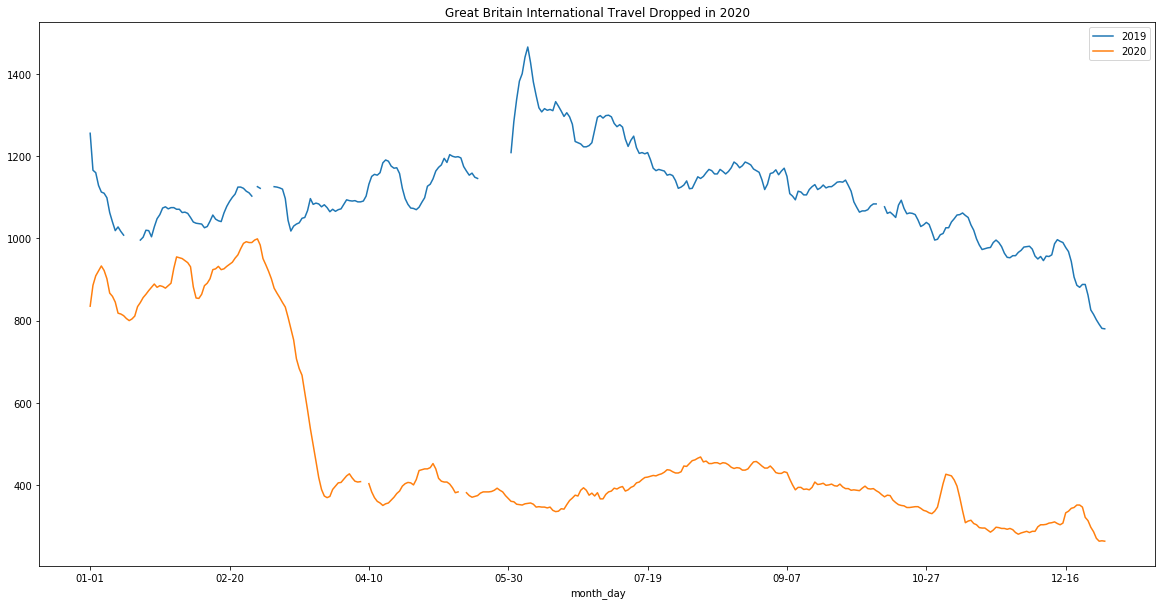

In [12]:
df_plot2.plot(y=years,figsize=(20,10), title="Great Britain International Travel Dropped in 2020")

# Case Study No. 2: Chicago's top-20 connected out-state counties in 2019.

In this case, we investigate the top-20 counties has the most connection with Chicago. Connection refers to the number of flows between to places. Flows involved in Chicago (both inflow and outflow) are derived from SafeGraph data, then are aggreated into county-level. Finally, the top-20 counties having flows with Chicago are extracted.

We also show how to map results from ODT Explorer using Keplergl.

## extract data

Grab data from SafeGraph country OD cude of 2019. It may take 2 minutes.

In [2]:
target_FIPS = "17031"  # Cook County in Chicago

params = {"operation": "od_extract_data",
       "odt_cube": "sg_od_2019_county",
       "begin": "01/01/2019" ,
       "end": "12/31/2019",
       "bbox": "-90,90,-180,180",
       "type": "aggregated"}

print("Fetching data...")
q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

df = pd.read_csv(StringIO(r.text))
df = df[df['d_place'] != df['o_place']]


df['o_place'] = df['o_place'].astype(str).str.zfill(5)
df['d_place'] = df['d_place'].astype(str).str.zfill(5)

df = df[df['d_place'] == target_FIPS]
print("Number of records:", len(df))
df.head()

Fetching data...
Number of records: 3209


,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
966,20057,17031,1550,37.757,-100.013,41.877,-87.727
2200,29023,17031,6760,36.749,-90.422,41.862,-87.718
10010,17011,17031,16447,41.380,-89.410,41.871,-87.766
12122,12045,17031,150,29.825,-85.290,41.894,-87.765
12822,42025,17031,728,40.877,-75.700,41.893,-87.791


In [4]:
top_count = 20
df_tops = df[df['o_place'].str[:2] != str(target_FIPS)[:2]]
df_tops = df_tops.sort_values('cnt',ascending = False).head(top_count)

df_tops

,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
555626,18089,17031,2436789,41.537,-87.428,41.733,-87.667
2170961,55079,17031,398701,43.036,-87.955,41.901,-87.762
4642228,29189,17031,395589,38.650,-90.404,41.882,-87.726
2719280,18097,17031,377216,39.797,-86.141,41.853,-87.715
895345,18127,17031,326769,41.521,-87.111,41.798,-87.697
2749644,06037,17031,296647,34.064,-118.304,41.904,-87.738
2456935,26163,17031,219050,42.338,-83.228,41.866,-87.718
3643245,27053,17031,215603,44.974,-93.351,41.887,-87.734
5069417,26125,17031,202811,42.575,-83.309,41.896,-87.719
5815186,04013,17031,191672,33.503,-111.996,41.904,-87.771


## show map

In [5]:
from keplergl import KeplerGl
import json

county_file = r'gz_2010_us_050_00_20m.json'
state_file = r'gz_2010_us_040_00_20m.json'

o_places = df_tops['o_place'].to_list()

county_gdf = geopandas.read_file(county_file)
state_gdf = geopandas.read_file(state_file)
state_gdf = state_gdf.set_index("STATE")
state_gdf = state_gdf.drop(['GEO_ID', 'LSAD', 'CENSUSAREA', 'geometry'], axis=1)

county_gdf['place'] = county_gdf['GEO_ID'].str[-5:]
county_tops = county_gdf[county_gdf['place'].isin(o_places)]
origin_place = county_gdf[county_gdf['place'] == str(target_FIPS)]


results = df_tops.set_index("o_place").join(county_gdf.set_index('place'))
series = [results['NAME'], results['cnt']]
results = pd.concat(series, axis=1)

results['STATE_CODE'] = results.index
results['STATE_CODE'] = results['STATE_CODE'].str[:2]
results = results.set_index('STATE_CODE').join(state_gdf, how="left", rsuffix="_STATE")
results = results.sort_values("cnt", ascending=False)  
results['Rank'] = results.reset_index().index + 1
results["County"] = results["NAME"] + ", " + results["NAME_STATE"]
# results = results.reset_index().drop(['index', 'NAME', 'NAME_STATE'], axis=1)
results = results[['County', 'cnt', 'Rank']]
print(results)

kepler_cfg_file = r'kepler_cfg.json'
kepler_cfg = json.load(open(kepler_cfg_file, 'r'))
map_2 = KeplerGl(height = 600)
map_2.config = kepler_cfg

map_2.add_data(data=county_tops, name='counties_geometry')
map_2.add_data(data=df_tops, name='df_tops')
map_2.add_data(data=origin_place, name='origin place')
 
map_2

                     County      cnt  Rank
18            Lake, Indiana  2436789     1
55     Milwaukee, Wisconsin   398701     2
29      St. Louis, Missouri   395589     3
18          Marion, Indiana   377216     4
18          Porter, Indiana   326769     5
06  Los Angeles, California   296647     6
26          Wayne, Michigan   219050     7
27      Hennepin, Minnesota   215603     8
26        Oakland, Michigan   202811     9
04        Maricopa, Arizona   191672    10
55       Kenosha, Wisconsin   190833    11
55          Dane, Wisconsin   181412    12
29        Jackson, Missouri   177470    13
48            Harris, Texas   171144    14
55      Waukesha, Wisconsin   168124    15
18      Tippecanoe, Indiana   165172    16
21      Jefferson, Kentucky   159054    17
20          Johnson, Kansas   154310    18
18      St. Joseph, Indiana   147614    19
48            Dallas, Texas   142717    20
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ou6ayf5', 'type': …

If needed, saved the config file of keplergl widget.

In [22]:
cfg = map_2.config
with open('kepler_cfg.json', 'w') as fp:
    json.dump(cfg, fp,  indent=2)

In [15]:
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()